In [1]:
import os
import json
import pathlib
import shutil

In [ ]:
val_dir = pathlib.Path('/root/dockspace/imagenet_candidate_training/data/ILSVRC/Data/CLS-LOC/val')
out_dir = pathlib.Path('/root/dockspace/imagenet_candidate_training/data/test')

In [ ]:
json_dir = pathlib.Path('/root/dockspace/search_download_images/flickr/')

with open(json_dir / 'chosen_wnids.json') as fn:
    chosen_wnids = json.load(fn)
    
with open('val_labels.txt', 'r') as fn:
    val_labels = fn.readlines()

In [ ]:
for cur_line in val_labels:
    _, cur_img, cur_wnid = cur_line.strip().strip('/').split(' ')
    
    if cur_wnid in chosen_wnids:
        cur_im_dir = val_dir / cur_img
        new_im_dir = out_dir / cur_wnid
        new_im_dir.mkdir(parents=True, exist_ok=True)
        cur_im_dir.rename(new_im_dir / cur_img)

In [ ]:
train_dir = pathlib.Path('/root/dockspace/imagenet_candidate_training/data/ILSVRC/Data/CLS-LOC/train')
out_train_dir = pathlib.Path('/root/dockspace/imagenet_candidate_training/data/train')

In [ ]:
for cur_wnid_path in train_dir.glob('*'):
    if cur_wnid_path.name in chosen_wnids:
        cur_wnid_path.rename(out_train_dir / cur_wnid_path.name)

In [ ]:
pathlib.Path('/root/dockspace/imagenet_candidate_training/data/ILSVRC/Data/CLS-LOC/train/n02091831').name

In [ ]:
imagenetv2_dir = pathlib.Path('/root/dockspace/imagenet_candidate_training/data/imagenetv2-matched-frequency/')
json_dir = pathlib.Path('/root/dockspace/search_download_images/flickr/')

with open(json_dir / 'imagenet_idx_wnid_name.json') as fn:
    idx_wnid_dict = json.load(fn)
    
with open(json_dir / 'chosen_wnids.json') as fn:
    chosen_wnids = json.load(fn)

In [ ]:
for lbl_dir in imagenetv2_dir.glob('*'):
    cur_idx = lbl_dir.name
    cur_wnid = list(idx_wnid_dict[cur_idx].keys())[0]
    
    if cur_wnid in chosen_wnids:
        lbl_dir.rename(lbl_dir.parent / cur_wnid)
    else:
        for cur_img in lbl_dir.glob('*'):
            print('[INFO]: deleting image {}'.format(cur_img))
            cur_img.unlink()
        lbl_dir.rmdir()

### Check and identify corrupt image files

In [27]:
from PIL import Image
from IPython.core.debugger import set_trace
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [28]:
def check_corrupt_files(check_dir):
    corrupt_files = []
    corrupt_count = {}
    
#     set_trace()

    for root, _, files in os.walk(check_dir):
        if files:
            print('Investigating {}'.format(root))
            corrupt_count[root.split('/')[-1]] = 0
            for cur_file in files:
                cur_fname = os.path.join(root, cur_file)
                try:
                    with open(cur_fname, 'rb') as fn:
                        img = Image.open(fn)
                        np_img = np.asarray(img.convert('RGB'))
                except:
                    corrupt_files.append(cur_fname)
                    corrupt_count[root.split('/')[-1]] += 1
            print('DONE')
    return corrupt_files, corrupt_count

In [29]:
check_dir = os.path.join(os.getcwd(), 'data/candidate/')

corrupt_files, corrupt_count = check_corrupt_files(check_dir)

Investigating /root/dockspace/imagenet_candidate_training/data/candidate/n01914609
DONE
Investigating /root/dockspace/imagenet_candidate_training/data/candidate/n02129165
DONE
Investigating /root/dockspace/imagenet_candidate_training/data/candidate/n04146614
DONE
Investigating /root/dockspace/imagenet_candidate_training/data/candidate/n03355925
DONE
Investigating /root/dockspace/imagenet_candidate_training/data/candidate/n02229544


/opt/conda/lib/python3.6/site-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


DONE
Investigating /root/dockspace/imagenet_candidate_training/data/candidate/n02509815
DONE
Investigating /root/dockspace/imagenet_candidate_training/data/candidate/n01984695
DONE
Investigating /root/dockspace/imagenet_candidate_training/data/candidate/n02788148
DONE
Investigating /root/dockspace/imagenet_candidate_training/data/candidate/n02802426
DONE
Investigating /root/dockspace/imagenet_candidate_training/data/candidate/n03388043
DONE
Investigating /root/dockspace/imagenet_candidate_training/data/candidate/n04356056
DONE
Investigating /root/dockspace/imagenet_candidate_training/data/candidate/n04532670
DONE
Investigating /root/dockspace/imagenet_candidate_training/data/candidate/n02486410
DONE
Investigating /root/dockspace/imagenet_candidate_training/data/candidate/n02268853
DONE
Investigating /root/dockspace/imagenet_candidate_training/data/candidate/n04399382
DONE
Investigating /root/dockspace/imagenet_candidate_training/data/candidate/n02843684
DONE
Investigating /root/dockspa

DONE
Investigating /root/dockspace/imagenet_candidate_training/data/candidate/n04008634
DONE
Investigating /root/dockspace/imagenet_candidate_training/data/candidate/n07715103
DONE
Investigating /root/dockspace/imagenet_candidate_training/data/candidate/n01855672
DONE
Investigating /root/dockspace/imagenet_candidate_training/data/candidate/n02190166
DONE
Investigating /root/dockspace/imagenet_candidate_training/data/candidate/n03599486
DONE
Investigating /root/dockspace/imagenet_candidate_training/data/candidate/n02504458
DONE
Investigating /root/dockspace/imagenet_candidate_training/data/candidate/n07749582
DONE
Investigating /root/dockspace/imagenet_candidate_training/data/candidate/n02808440
DONE
Investigating /root/dockspace/imagenet_candidate_training/data/candidate/n02403003
DONE
Investigating /root/dockspace/imagenet_candidate_training/data/candidate/n01774750
DONE
Investigating /root/dockspace/imagenet_candidate_training/data/candidate/n02769748
DONE
Investigating /root/dockspa

In [30]:
corrupt_count

{'n01914609': 0,
 'n02129165': 1,
 'n04146614': 1,
 'n03355925': 0,
 'n02229544': 0,
 'n02509815': 0,
 'n01984695': 0,
 'n02788148': 0,
 'n02802426': 0,
 'n03388043': 0,
 'n04356056': 1,
 'n04532670': 0,
 'n02486410': 0,
 'n02268853': 0,
 'n04399382': 0,
 'n02843684': 1,
 'n07615774': 2,
 'n02730930': 0,
 'n03662601': 0,
 'n01770393': 0,
 'n02950826': 2,
 'n03201208': 1,
 'n02814533': 0,
 'n01945685': 0,
 'n02132136': 0,
 'n02395406': 1,
 'n01910747': 0,
 'n03089624': 0,
 'n03670208': 1,
 'n03977966': 0,
 'n02415577': 0,
 'n03100240': 0,
 'n07579787': 0,
 'n02165456': 0,
 'n04070727': 0,
 'n02841315': 0,
 'n04074963': 1,
 'n01770081': 0,
 'n02279972': 0,
 'n02276258': 0,
 'n02410509': 0,
 'n02793495': 9,
 'n02099601': 1,
 'n03126707': 0,
 'n01944390': 0,
 'n07747607': 0,
 'n04417672': 0,
 'n02226429': 0,
 'n03976657': 2,
 'n03424325': 0,
 'n02699494': 2,
 'n01443537': 0,
 'n02906734': 0,
 'n07614500': 1,
 'n06596364': 0,
 'n03770439': 6,
 'n01985128': 0,
 'n02917067': 0,
 'n04540053': 

In [31]:
for crpt_fn in corrupt_files:
    print('[INFO]: Deleting corrupt image at {}'.format(crpt_fn))
    os.remove(crpt_fn)
    print('DONE')

[INFO]: Deleting corrupt image at /root/dockspace/imagenet_candidate_training/data/candidate/n02129165/64e3a8a9da954fe4bbb58e3a507f415c55bd73d4.jpg
DONE
[INFO]: Deleting corrupt image at /root/dockspace/imagenet_candidate_training/data/candidate/n04146614/1c5f33adb53f5c426f481b5b647271b5311ee7b3.jpg
DONE
[INFO]: Deleting corrupt image at /root/dockspace/imagenet_candidate_training/data/candidate/n04356056/a4dd57ebdfdaf408820043ec7e0176f50d694270.jpg
DONE
[INFO]: Deleting corrupt image at /root/dockspace/imagenet_candidate_training/data/candidate/n02843684/1db489b34ca1a306a3c0daf7d737bffa1f7cc31e.png
DONE
[INFO]: Deleting corrupt image at /root/dockspace/imagenet_candidate_training/data/candidate/n07615774/a31d2deab6b322274a2f5cc838de10eb9ccc7963.png
DONE
[INFO]: Deleting corrupt image at /root/dockspace/imagenet_candidate_training/data/candidate/n07615774/2819ef5fa53be2e8df32f3ffe314130cd4845b63.png
DONE
[INFO]: Deleting corrupt image at /root/dockspace/imagenet_candidate_training/data

In [23]:
im_file = ('/root/dockspace/imagenet_candidate_training/data/candidate/' + 
           'n03770439/8c8440baa3a8303485ce16f4a2935afbf9004abe.png')

In [24]:
img = plt.imread(im_file)
# img_pil = Image.fromarray(img)

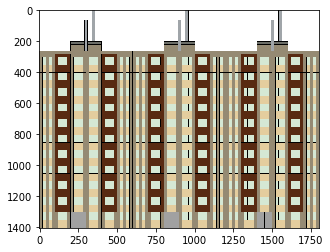

In [25]:
plt.imshow(img)

In [56]:
img = Image.open(im_file)
abc =np.asarray(img)

In [52]:
with open(im_file, 'rb') as fn:
    img = Image.open(fn)

In [41]:
img

ValueError: seek of closed file

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x7F641EE79550>

### Merge subdirectories under classes

In [1]:
import pathlib
import os

In [92]:
cls_dir = pathlib.Path.cwd() / 'data/candidate_mess/'
new_dir = pathlib.Path.cwd() / 'data/candidate/'

for cur_dir in cls_dir.iterdir():
    cur_wnid = cur_dir.name + '/'
    target_dir = new_dir / cur_wnid
    target_dir.mkdir()
    
    for root, _, files in os.walk(str(cur_dir.resolve())):
        for cur_file in files:
            cur_path = pathlib.Path(root) / cur_file
            target_path = target_dir / cur_file
            cur_path.rename(target_path)

In [130]:
os.listdir('/root/dockspace/imagenet_candidate_training/data/candidate/n02165456')[:100]

['c998958b7cf769593f55cd74f8b4eb69c374c98e.jpg',
 'a20f61f78cc64336b0465fc097c969ce6fc3a9c0.png',
 '74186d7507767b636ed001bb7cbbd46c22605920.jpg',
 'ca956fedef307d84a073273a42127e772b4a4e94.jpg',
 '50ddd81dbdf732f233661e210a5857bf8f6e6216.jpg',
 '6de53583a4bdf52c37d4c0f0cf1ffb7e264b468f.jpg',
 '2a4c5484561b1f7d292fcd455bbb071169e18533.jpg',
 'a36ef6caf03e6bda1540f7e89e28bb8e1ab7e591.jpg',
 'c0d93559b30bdd01dde97cdbe24578b91ae5cf7f.jpg',
 'd75f3c62fb191f93c00183cead159e7c6311c1d1.jpg',
 'de16a4d35b60b0e9270acdc7a3be73f21364e6ee.jpg',
 '4ed9ef6225d8fa76559b88c4f6be42fc4cc1444c.jpg',
 'f17941e500e2f0710a1a1d2379487ffa484d474a.jpg',
 'fe47e6231ab35e434a1591fe2507fe39061ca128.jpg',
 '8791c5bf41e24890bdb27897b5a1486534e13245.jpg',
 '093acbc68add78a22b80f4f5b535d17d765d8a5f.jpg',
 '8973bd13d450f5d848541036ff128389938bb114.jpg',
 '8d7f792539ffc67541c9628c14929af1c758781b.jpg',
 'a85b54202a8f92ce5d334e7c9229836cf32d5977.jpg',
 '33d8a3734bb0b34e48d076783f31d4ad162f81fe.jpg',
 '9a153b5f99fced7c2f

In [131]:

os.listdir('/root/dockspace/imagenet_candidate_training/data/test/')

['n02165456',
 'n02165105',
 'n01770081',
 'n01944390',
 'n01768244',
 'n01980166',
 'n01950731',
 'n02177972',
 'n01775062',
 'n02268443',
 'n02233338',
 'n02206856',
 'n01774750',
 'n01784675',
 'n02256656']

In [134]:
os.listdir('/root/dockspace/imagenet_candidate_training/data/candidate/')

['n02165456',
 'n02165105',
 'n01770081',
 'n01944390',
 'n01768244',
 'n01980166',
 'n01950731',
 'n02177972',
 'n01775062',
 'n02268443',
 'n02233338',
 'n02206856',
 'n01774750',
 'n01784675',
 'n02256656']

## Change the classes according to min number of images

In [2]:
# Define the directories
json_dir = pathlib.Path('/root/dockspace/search_download_images/flickr/')
down_dir = pathlib.Path('/root/dockspace/search_download_images/data/downloads/')
cand_dir = pathlib.Path.cwd() / 'data/candidate/'
train_dir = pathlib.Path.cwd() / 'data/train/'
test_dir = pathlib.Path.cwd() / 'data/test/'

other_cand_dir = pathlib.Path.cwd() / 'data/candidate_other/'
other_train_dir = pathlib.Path.cwd() / 'data/train_other/'
other_test_dir = pathlib.Path.cwd() / 'data/test_other/'

imgnet_train_dir = pathlib.Path('/root/dockspace/imagenet_candidate_training/data/ILSVRC/Data/CLS-LOC/train')
imgnet_val_dir = pathlib.Path('/root/dockspace/imagenet_candidate_training/data/ILSVRC/Data/CLS-LOC/val')

#### Compute the number of images per class and move the non-used classes into other folders

In [3]:
# INFO: This step should only select classes and move the rest to _other folders
min_allowed_imgs = 3000

selected_cls = [cur_dir.name for cur_dir in other_cand_dir.iterdir() 
                if len(list(cur_dir.iterdir())) >= min_allowed_imgs]

In [3]:
# INFO: Uncomment this part only if you have the selected classes in a file
selected_cls_file = pathlib.Path.cwd() / 'top100_wnid_on_acc_diff.json'

with open(selected_cls_file) as fn:
    selected_cls = json.load(fn)

In [4]:
len(selected_cls)

35

#### Check there are no collisions between candidate directories

In [6]:
other_cls = [cur_dir.name for cur_dir in other_cand_dir.iterdir()]

In [7]:
for cur_wnid in other_cls:
    cur_dir = cand_dir / cur_wnid
    if cur_dir.exists():
        if not len(list(cur_dir.iterdir())):
            cur_dir.rmdir()
            print('[INFO]: Removed empty directory {}'.format(cur_dir))

#### Move the unused classes to other directories

In [9]:
for cur_dir in cand_dir.iterdir():
    if not cur_dir.name in selected_cls:
        cur_dir.rename(other_cand_dir / cur_dir.name)

In [10]:
for cur_dir in train_dir.iterdir():
    if not cur_dir.name in selected_cls:
        cur_dir.rename(other_train_dir / cur_dir.name)

In [8]:
for cur_dir in test_dir.iterdir():
    if not cur_dir.name in selected_cls:
        cur_dir.rename(other_test_dir / cur_dir.name)

#### Move the training and test classes corresponding to candidates back into train and test directories

In [18]:
for cur_dir in other_train_dir.iterdir():
    if cur_dir.name in selected_cls:
        cur_dir.rename(train_dir / cur_dir.name)

In [19]:
for cur_dir in other_test_dir.iterdir():
    if cur_dir.name in selected_cls:
        cur_dir.rename(test_dir / cur_dir.name)

#### Merge subdirectories under classes

In [4]:
from tqdm import tqdm

In [6]:
for cur_dir in tqdm(down_dir.iterdir()):
    cur_wnid = cur_dir.name
    target_dir = cand_dir / cur_wnid
    target_dir.mkdir(exist_ok=True)
    
    for root, _, files in os.walk(str(cur_dir.resolve())):
        for cur_file in files:
            cur_path = pathlib.Path(root) / cur_file
            target_path = target_dir / cur_file
            cur_path.rename(target_path)

223it [01:23,  1.67it/s]


#### Copy other test classes into test_copy directory

In [5]:
copy_test_dir = pathlib.Path.cwd() / 'data/test_copy/'

In [10]:
for cur_dir in other_test_dir.iterdir():
    if cur_dir.name in selected_cls:
#         print('[{}]'.format(cnt) + str(cur_dir) + '\n' + str(copy_test_dir / cur_dir.name) + '\n\n')
        shutil.copytree(str(cur_dir), str(copy_test_dir / cur_dir.name))

#### Transfer all training classes under train directory

```
for cur_train_cls in imgnet_train_dir.glob('*'):
    cur_wnid = cur_train_cls.name
    cur_dir = train_dir / cur_wnid
    cur_dir.mkdir()
    
    cur_train_cls.rename(cur_dir)```

#### Transfer all validation images under test directory

```
with open('val_labels.txt', 'r') as fn:
    val_labels = fn.readlines()
    
val_dict = {}
    
for cur_line in val_labels:
    _, cur_img, cur_wnid = cur_line.strip().strip('/').split(' ')
    
    if not cur_wnid in val_dict:
        val_dict[cur_wnid] = []
        
    val_dict[cur_wnid].append(cur_img)
```

```
for cur_wnid, cur_im_list in val_dict.items():
    if not cur_wnid in chosen_wnids:
        cur_dir = test_dir / cur_wnid
        cur_dir.mkdir()

        for cur_img in cur_im_list:
            cur_file = imgnet_val_dir / cur_img
            new_file = cur_dir / cur_img
            cur_file.rename(new_file)
```